Eğim (katsayı): [2.77011339]
Kesişim (sabit): [4.21509616]
Ortalama Kare Hata (MSE): 0.8065845639670531


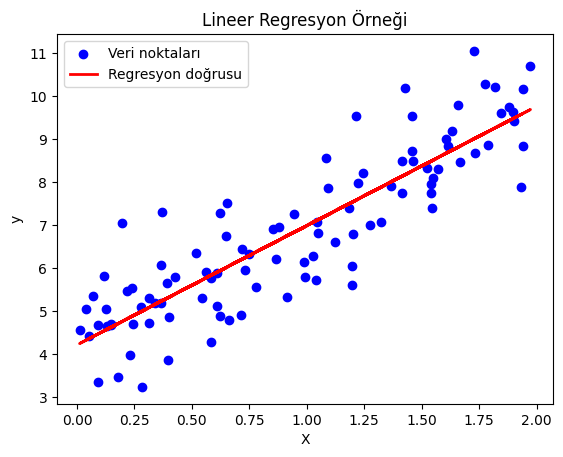

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Rastgele veri seti oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Bağımsız değişken
y = 4 + 3 * X + np.random.randn(100, 1)  # Bağımlı değişken (gürültü eklenmiş)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Modelin katsayıları (eğim ve kesişim)
print("Eğim (katsayı):", model.coef_[0])
print("Kesişim (sabit):", model.intercept_)

# Tahmin yapma
y_pred = model.predict(X)

# Ortalama Kare Hata (MSE) hesaplama
mse = mean_squared_error(y, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

# Veriyi ve regresyon doğrusunu görselleştirme
plt.scatter(X, y, color='blue', label='Veri noktaları')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresyon doğrusu')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineer Regresyon Örneği')
plt.legend()
plt.savefig('linear_regression_plot.png')

Başlangıç x: 4.0
Son x: 3.2331251098590505e-11
Son kayıp fonksiyonu değeri (f(x)): 1.0453097976001098e-21


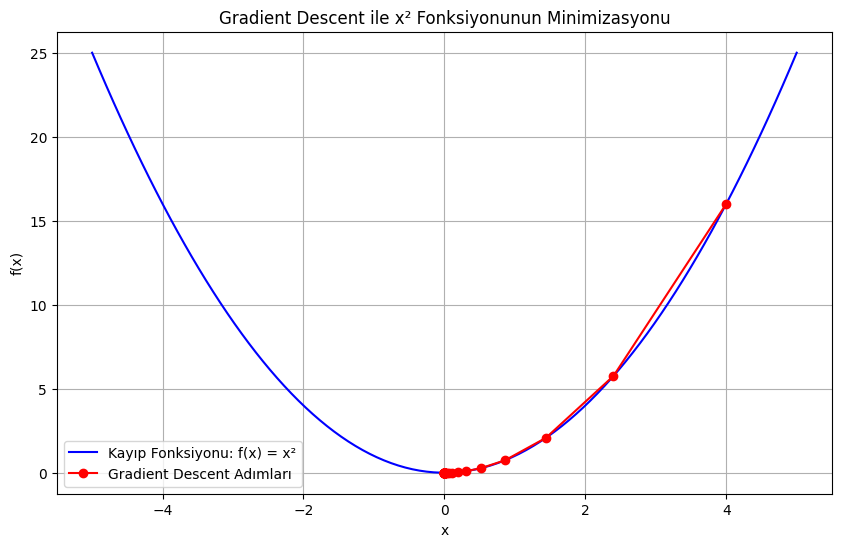

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kayıp fonksiyonu: f(x) = x^2
def loss_function(x):
    return x**2

# Kayıp fonksiyonunun türevi (gradyan): f'(x) = 2x
def gradient(x):
    return 2 * x

# Gradient Descent parametreleri
learning_rate = 0.2  # Öğrenme oranı
n_iterations = 50    # İterasyon sayısı
x_initial = 4.0      # Başlangıç noktası

# Gradient Descent
x = x_initial
x_history = [x]  # x değerlerini kaydetmek için liste

for i in range(n_iterations):
    grad = gradient(x)  # Gradyanı hesapla
    x = x - learning_rate * grad  # x'i güncelle
    x_history.append(x)  # Yeni x'i kaydet

# Sonuçları yazdırma
print("Başlangıç x:", x_initial)
print("Son x:", x)
print("Son kayıp fonksiyonu değeri (f(x)):", loss_function(x))

# Görselleştirme
x_range = np.linspace(-5, 5, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, 'b-', label='Kayıp Fonksiyonu: f(x) = x²')
plt.plot(x_history, [loss_function(x) for x in x_history], 'ro-', label='Gradient Descent Adımları')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent ile x² Fonksiyonunun Minimizasyonu')
plt.legend()
plt.grid(True)
plt.savefig('gradient_descent_non_linear_plot.png')